K2Per: 9.3908

K2Per: 0.4812

K2Per: 10.1182

K2Per: 1.4486

Line skipped for no K2Per value: 5

K2Per: 12.3168

K2Per: 23.1244

K2Per: 0.2967

K2Per: 1.3183

Line skipped for no K2Per value: 10

K2Per: 0.8037

K2Per: 1.8626

K2Per: 0.205

K2Per: 1.2774

K2Per: 2.4191

K2Per: 12.8433

Line skipped for no K2Per value: 17

K2Per: 10.9678

K2Per: 20.3105

K2Per: 0.8968

K2Per: 2.3788

K2Per: 1.8884

Line skipped for no K2Per value: 23

Line skipped for no K2Per value: 24

Line skipped for no K2Per value: 25

K2Per: 1.0542

number of points plotted: 20
numer of lines skipped: 6
Theoretical amount of points to plot: 36


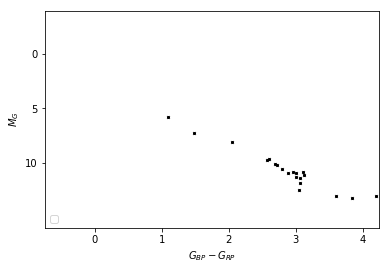

In [3]:
# In the original ClusterCMD, the Hyades cluster wasn't plotting correctly. The rotational period based colors were off, and it wasn't plotting all the points
# This is one attempt to fix that problem by investigating the NaN values in the .csv
# Unfortunately, this method was skipping extra lines that even had non-NaN rotational periods.
# Still unsure why it skipped so many.
# Note: there are only 10 NaN values, and technically 36 points, ideall we would be plotting 26 points

import pandas as panda
import numpy as np
import matplotlib.pyplot as plt
def main():
    Hyades = panda.read_csv("../Hyades/Hyades(With Rotation).csv")

    # Redefining dataframe to only have values that exist in K2Per column
    Hyades2 = Hyades[np.isfinite(Hyades['K2Per'])]
    HyadesDistMod = distMod(Hyades2['parallax'])
    
    # running a loop to only plot points for rows that exist using new dataframe
    # j acts as a counter to count how many points are plotted, k acts as the number of lines skipped
    j = 0
    k = 0
    for i in range(len(Hyades2)):
        if i not in [4, 9, 16, 22, 23, 24]: # Rows that dont have an existing value in K2Per column
            plt.scatter(Hyades2.iloc[i]["bp_rp"], Hyades2.iloc[i]["phot_g_mean_mag"]-HyadesDistMod[i], marker = "x", s = 6, color = "black")
            j+=1
            print("K2Per: " + str(Hyades2.iloc[i]["K2Per"]) + "\n")
        if i in [4, 9, 16, 22, 23, 24]:
            print("Line skipped for no K2Per value: " + str(i+1) + "\n")
            k+=1
    
    print("number of points plotted: " + str(j))
    print("numer of lines skipped: " + str(k))
    print("Theoretical amount of points to plot: " + str(len(Hyades)))

    # axis details
    plt.ylabel("$M_G$")
    plt.xlabel("$G_{BP} - G_{RP}$")
    plt.legend(loc = "lower left", markerscale = 4)
    plt.xlim(-0.75, 4.25)
    plt.xticks([0, 1, 2, 3, 4])
    plt.ylim(16, -4)
    plt.yticks([0, 5, 10])
        
    plt.show()


def distMod(parallax):
    result = 5*(np.log10(1000/parallax)-1)
    return result


main()